In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<Axes: xlabel='Purchased', ylabel='count'>

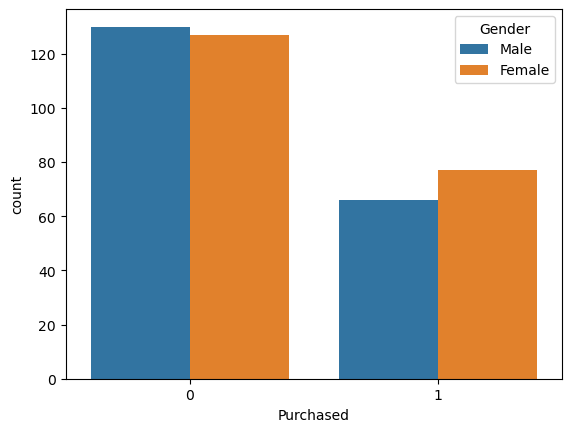

In [6]:
sns.countplot(x='Purchased', hue="Gender",data=df)

c:\Users\Adem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


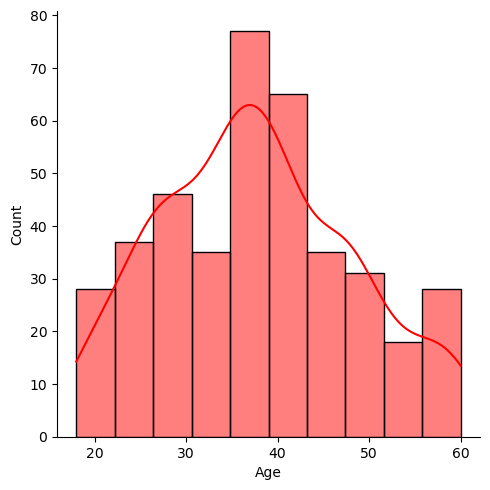

In [7]:
sns.displot(x="Age", data=df, color="red", kde=True)

# Cleaning the data #

We will use Gender, Age and EstimatedSalaray to predict whether they buy it or not. UserID will be dropped

In [8]:
df.drop("User ID", axis=1, inplace=True)

In [9]:
df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [11]:
#We can see Gender is an categorical variable so we need to transform it with one-ht encoding or with get_dummies from pandas

gender = pd.get_dummies(df["Gender"], drop_first=True)
df.drop("Gender",axis=1, inplace= True)
df = pd.concat([df, gender], axis=1)

df.head(10)


,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True
5,27,58000,0,True
6,27,84000,0,False
7,32,150000,1,False
8,25,33000,0,True
9,35,65000,0,False


# Split it up into dependent and independent variable # 

In [12]:
#These are the independent variables namely age, estimated salary, male
X = df.iloc[:,[0,1,3]]
print(X)

     Age  EstimatedSalary   Male
0     19            19000   True
1     35            20000   True
2     26            43000  False
3     27            57000  False
4     19            76000   True
..   ...              ...    ...
395   46            41000  False
396   51            23000   True
397   50            20000  False
398   36            33000   True
399   49            36000  False

[400 rows x 3 columns]


In [13]:
y = df.iloc[:,2]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


Feature scaling is a method used to normalize the range of independent variables. The method enables the independent variables to be in the same range

In [14]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

# Split dataset into train and test sets

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


In [16]:


classifier = LogisticRegression()
classifier.fit(X_train, y_train)



LogisticRegression()

In [17]:
from sklearn import svm
classifier2 = svm.SVC(kernel='linear')
classifier2.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Comparing how the different classification algorithms will perform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

logistic_classifier = LogisticRegression()
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = GaussianNB()

# Using these classifiers to fit our data, X_train and y_train
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
# Predicting the test set results
logistic_y_prediction = logistic_classifier.predict(X_test)
decision_y_prediction = decision_classifier.predict(X_test)
svm_y_prediction = svm_classifier.predict(X_test)
knn_y_prediction = knn_classifier.predict(X_test)
naive_y_prediction = naive_classifier.predict(X_test)

In [20]:
print(accuracy_score(logistic_y_prediction, y_test))
print(accuracy_score(decision_y_prediction, y_test))
print(accuracy_score(svm_y_prediction, y_test))
print(accuracy_score(knn_y_prediction, y_test))
print(accuracy_score(naive_y_prediction, y_test))

0.8083333333333333
0.8416666666666667
0.875
0.8666666666666667
0.8416666666666667


In [21]:
# Printing the classification report
print('Logistic classifier:')
print(classification_report(y_test, logistic_y_prediction))

print('Decision Tree classifier:')
print(classification_report(y_test, decision_y_prediction))

print('SVM Classifier:')
print(classification_report(y_test, svm_y_prediction))

print('KNN Classifier:')
print(classification_report(y_test, knn_y_prediction))

print('Naive Bayes Classifier:')
print(classification_report(y_test, naive_y_prediction))

Logistic classifier:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.79      0.71      0.75        48

    accuracy                           0.81       120
   macro avg       0.80      0.79      0.80       120
weighted avg       0.81      0.81      0.81       120

Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        72
           1       0.80      0.81      0.80        48

    accuracy                           0.84       120
   macro avg       0.83      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120

SVM Classifier:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        72
           1       0.80      0.92      0.85        48

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted av

In [22]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Actual " : y_test, "Predicted" : y_pred})
results



,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
...,...,...
91,0,0
322,0,0
248,0,0
186,0,0


In [23]:

y_pred_svc = classifier2.predict(X_test)

results2 = pd.DataFrame({"Actual " : y_test, "Predicted" : y_pred_svc})
results2


,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
...,...,...
91,0,0
322,0,0
248,0,0
186,0,0


In [24]:
print(classifier.coef_)
print(classifier.intercept_)

[[2.36839196 1.42929561 0.20973787]]
[-1.1352347]


In [25]:
print(classifier2.coef_)
print(classifier2.intercept_)

[[1.78447008 1.09251514 0.0617681 ]]
[-0.90766317]


In [26]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[63,  9],
       [14, 34]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

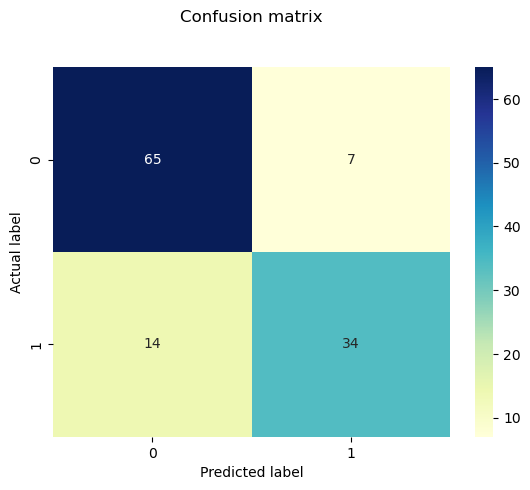

In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix2 = confusion_matrix(y_test, y_pred_svc)
cf_matrix2

sns.heatmap(pd.DataFrame(cf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 23.52222222222222, 'Predicted label')

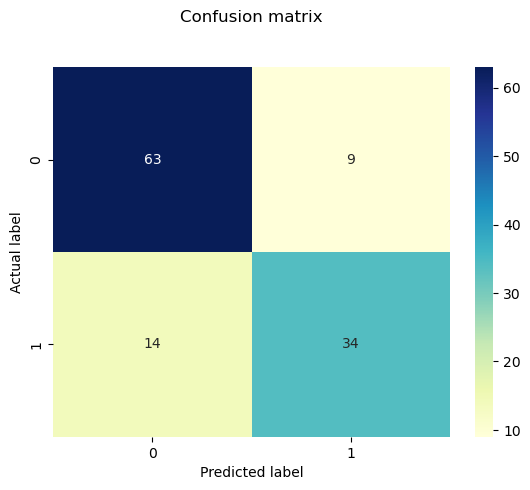

In [28]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

From the confusion_matrix, we have the following observations:

63 TN predictions: zeros predicted correctly.
14 FN predictions: ones wrongly predicted as zeros.
9 FP predictions: zeros that were wrongly predicted as ones.
34 TP predictions: ones predicted correctly.

In [29]:
#Test the Models Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
#0.8083333333333333

accuracy_score(y_test, y_pred_svc)
#0.825

0.825

In [30]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120



In [31]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred_svc,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.90      0.86        72
    will PURCHASE       0.83      0.71      0.76        48

         accuracy                           0.82       120
        macro avg       0.83      0.81      0.81       120
     weighted avg       0.83      0.82      0.82       120

